In [12]:
import cv2
import imutils

# Question 1
# Load the image
image = cv2.imread('images/lena.jfif')

# Rotate the image by 45 degrees without cropping
rotated_image = imutils.rotate_bound(image, angle=45)

# Display the original and rotated images
cv2.imshow('Original Image', image)
cv2.imshow('Rotated Image', rotated_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [6]:
# Question 2
# Load the images
background = cv2.imread('images/native-bee.png')
overlay = cv2.imread('images/flower.jfif')

# Resize the overlay image to match the background dimensions
overlay = cv2.resize(overlay, (background.shape[1], background.shape[0]))

# Create a mask using thresholding on the overlay image
gray_overlay = cv2.cvtColor(overlay, cv2.COLOR_BGR2GRAY)
_, mask = cv2.threshold(gray_overlay, 200, 255, cv2.THRESH_BINARY)

# Invert the mask
mask_inv = cv2.bitwise_not(mask)

# Extract the region of interest (ROI) from the background
roi = background[0:overlay.shape[0], 0:overlay.shape[1]]

# Apply AND operation to combine the images using the mask
result = cv2.bitwise_and(roi, roi, mask=mask_inv)
result += overlay

# Place the combined result back onto the background
background[0:overlay.shape[0], 0:overlay.shape[1]] = result

# Display the result
cv2.imshow('Overlay Result', background)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [15]:
import cv2
import numpy as np

# Load the image
image = cv2.imread('images/native-bee.png')

# Define the sharpening kernel
sharpening_kernel = np.array([[-1, -1, -1],
                              [-1, 9, -1],
                              [-1, -1, -1]])

# Apply the custom sharpening kernel
sharpened_image = cv2.filter2D(image, -1, sharpening_kernel)

# Display the original and sharpened images
cv2.imshow('Original Image', image)
cv2.imshow('Sharpened Image', sharpened_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

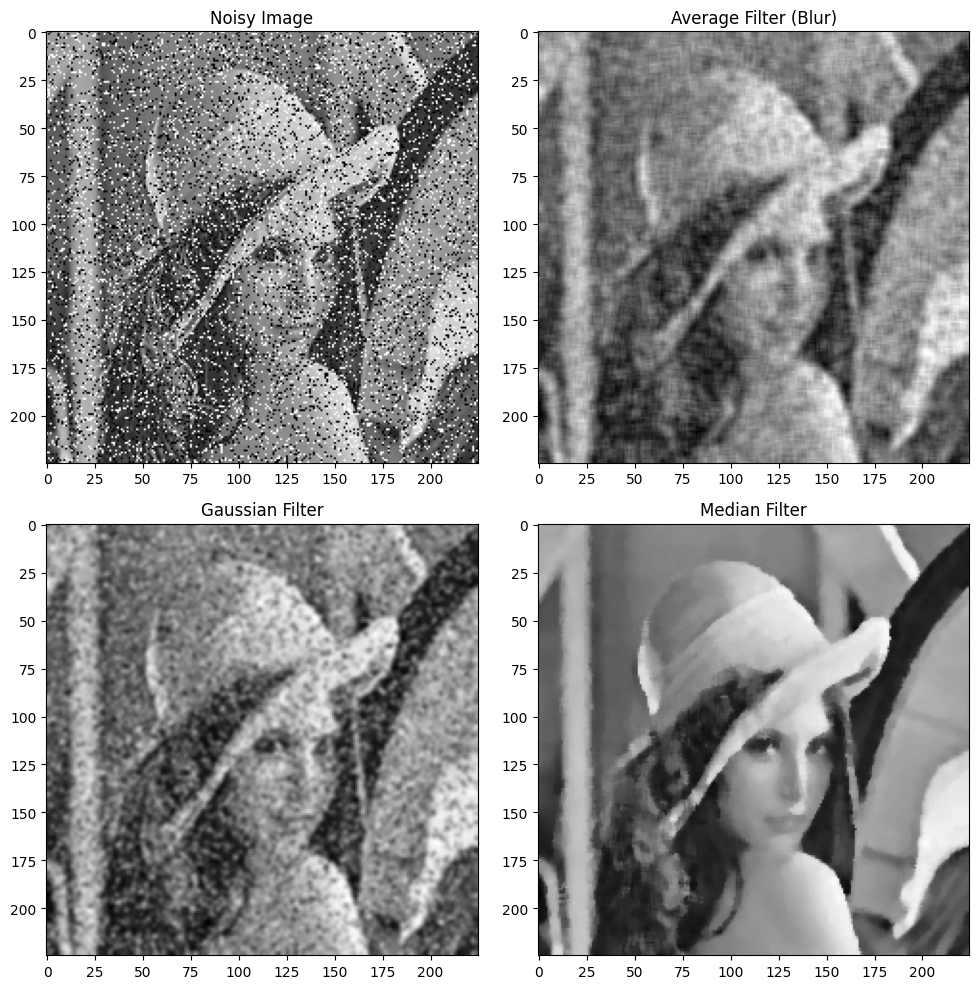

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
# Question 4
# Load the noisy image
noisy_image = cv2.imread('images/noise_lena.jpg', cv2.IMREAD_GRAYSCALE)

# Apply average filter (blur) with a 5x5 kernel
average_blur = cv2.blur(noisy_image, (5, 5))

# Apply Gaussian filter with a 5x5 kernel and standard deviation of 0
gaussian_blur = cv2.GaussianBlur(noisy_image, (5, 5), 0)

# Apply median filter with a 5x5 kernel
median_blur = cv2.medianBlur(noisy_image, 5)

# Display the original and smoothed images
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.imshow(noisy_image, cmap='gray')
plt.title('Noisy Image')

plt.subplot(2, 2, 2)
plt.imshow(average_blur, cmap='gray')
plt.title('Average Filter (Blur)')

plt.subplot(2, 2, 3)
plt.imshow(gaussian_blur, cmap='gray')
plt.title('Gaussian Filter')

plt.subplot(2, 2, 4)
plt.imshow(median_blur, cmap='gray')
plt.title('Median Filter')

plt.tight_layout()
plt.show()
